# Simulating a simple linear SISO system

Mikhail Pak, 2017

In [1]:
from controlboros import StateSpaceBuilder
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In this notebook, we shall simulate the step response of a simple system using `scipy.signal` and `controlboros`.

The system is defined by the following transfer function:

$$H(s) = \frac{1}{s^2 + 0.5 s + 1}$$

We want to simulate from 0 to 10 seconds:

In [2]:
t_begin, t_end = 0.0, 10.0

We use 0.1 ms sample time for the reference simulation performed with `scipy.signal`:

In [3]:
dt_ref = 1.0e-4

As for `controlboros`, it should use 200 ms sample time to highlight the difference: 

In [4]:
dt_cb = 2.0e-1

Ok. Now we create a reference system using `scipy.signal` and compute its step response:

In [5]:
t_ref, y_ref = signal.step(
    ([1.0], [1.0, 0.5, 1.0]),
    T=np.arange(t_begin, t_end, dt_ref),
    )

Now we create a `controlboros.StateSpace` model using the builder pattern.

Notice that `discretise()` is just a wrapper around `scipy.signal.cont2discrete()`. It uses the zero-order hold method per default. You can play around and see the difference e.g. when using the Tustin's approximation (`method="bilinear"`).

In [6]:
sys_cb = StateSpaceBuilder().from_tf([1.0], [1.0, 0.5, 1.0])\
                            .discretise(dt_cb)\
                            .build()

And we initialise arrays for the step response:

In [7]:
excitation = np.array([1.0])  # Constant step excitation
t_cb = np.arange(t_begin, t_end, dt_cb)
y_cb = np.zeros((len(t_cb),))

We're ready to run the main loop:

In [8]:
# Reset the inital state of the systems,
# helpful if you run this cell multiple times!
sys_cb.set_state_to_zero()

for i in range(len(t_cb)):
    y_cb[i] = sys_cb.push_stateful(excitation)

Plot and compare results:

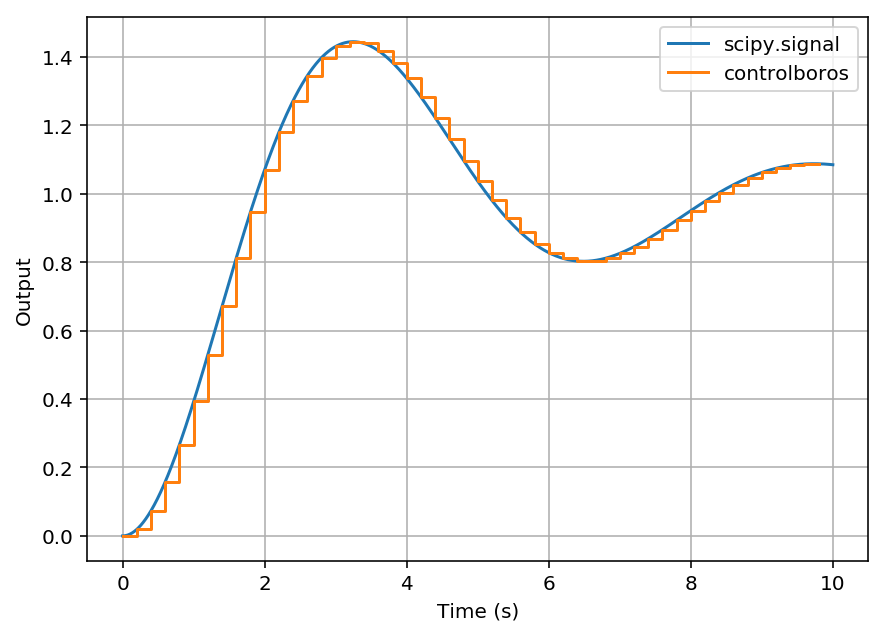

In [9]:
plt.figure(figsize=(7, 5))
plt.plot(t_ref, y_ref)
plt.step(t_cb, y_cb, where="post")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.legend(["scipy.signal", "controlboros"])
plt.grid()
plt.show()